# Final Case Study - League of Legends Win Conditions 

## Introduction
<a href="https://www.leagueoflegends.com/en-us/">League of Legends</a> (LoL), commonly referred to as League, is a 2009 <a href="https://en.wikipedia.org/wiki/Multiplayer_online_battle_arena">MOBA</a> video game developed by Riot Games. 

In the game, two five-player teams engage in player-versus-player combat to defend their half of the map, push through the enemy base, and destroy the enemy's "Nexus". The first team that destroys the enemy's Nexus wins the game.

In this case study, we will use Kaggle's <a href="https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min">League of Legends Diamond Ranked Games (10 min) Dataset</a> to create data visualizations, analyze win conditions of the game, create a linear classification model to predict the outcome of a game, and analyze the behavior of our model.


## Glossary 
* **Ward**: An item that a player can place on the map to reveal nearby area; very useful for map & objective control

* **Minions**: Units generated by the Nexus; belongs to the team it was generated on and grants the enemy team gold when killed  

* **Jungle Monsters**: Monsters generated across the map; belongs to no team and grants gold & buffs to those who kill it 

* **Elite Monsters**: Monsters with high hp/damage that give a massive bonus in gold, experience, and stats when killed by a team 

    * **Dragons**: Elite monster that grants a team bonus when killed 

        * **Dragon Soul**: The fourth dragon killed by a team grants a massive stat bonus 

        * **Elder Dragon**: Grants massive stats bonus when killed by a team 
        
    * **Herald**: Elite monster that grants a stats bonus when killed; helps push lanes and destroy enemy towers 

* **Towers**: Structures that must be destroyed to reach the enemy Nexus; grant gold when destroyed 

* **Level**: Champion level; starts at 1 and maxes out at 18 


*Note: This case study assumes a basic understanding of League gameplay & terminology; if you are unfamiliar with the game or would like to brush up on your understanding of it, feel free to head over to the <a href="https://en.wikipedia.org/wiki/League_of_Legends">LoL Wikipedia</a> or Riot's <a href="https://www.leagueoflegends.com/en-us/how-to-play/">How To Play</a>.*

## Why
I chose to work with this data set as I enjoy playing League in my free time, and I've always been curious about the win conditions in League as it's such a complex game. 

From my own research and in-game experience, gold and experience seem to be the most consistent factors in winning a game. This makes sense, as it allows players to obtain more items and higher champion levels. 

I'm curious to see if my findings will support this, and I would like to see how other conditions (such as vision, objectives, KDAs, and first bloods) come into play. 

## Set Up
First, let's import the data set and data analysis/visualization libraries. 

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

Now, let's import the data and view it. 

In [2]:
allgames_df = pd.read_csv('high_diamond_ranked_10min.csv')
print("Number of rows: ", allgames_df.shape[0])
print("Number of columns: ", allgames_df.shape[1])

Number of rows:  9879
Number of columns:  40


Wow! That's a lot of data. Next, let's check the data type of each column and the number of non-missing rows. 

In [3]:
allgames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Since the data types are all 'float' and 'int' and there are no missing values, we do not need to do any preprocessing! Let's browse through some of the data. 

Let's look at the first few rows: 

In [4]:
allgames_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Let's look at the last few rows: 

In [5]:
allgames_df.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


Let's look at a random sample of 10 rows: 

In [6]:
n = 10
allgames_df.sample(n)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
744,4522797583,0,17,2,1,3,4,6,1,1,...,0,16750,7.2,19314,253,51,2141,2439,25.3,1675.0
7146,4517738815,1,16,2,1,4,6,3,0,0,...,0,16382,6.8,18462,244,45,517,425,24.4,1638.2
1133,4521091433,0,19,3,0,10,10,15,0,0,...,0,18102,7.0,18092,220,47,-622,-319,22.0,1810.2
7415,4467978443,0,18,3,0,7,6,10,1,0,...,0,16309,6.8,17156,196,44,361,1022,19.6,1630.9
3344,4469754326,1,21,2,1,13,11,8,1,1,...,0,17775,6.4,16417,182,44,-1059,-1185,18.2,1777.5
1346,4457019061,1,17,5,1,7,8,8,0,0,...,0,16460,6.4,16150,205,35,-903,-1019,20.5,1646.0
8871,4518459736,1,12,1,1,9,4,8,1,0,...,0,14777,7.0,17844,179,52,-5201,-1656,17.9,1477.7
6588,4479932808,0,15,3,0,1,3,1,0,0,...,0,15671,7.2,18091,238,47,2033,1612,23.8,1567.1
5398,4520558243,1,18,2,1,9,6,7,1,1,...,0,16678,7.0,18792,212,56,-338,232,21.2,1667.8
6709,4526264918,0,39,1,0,0,4,0,0,0,...,0,16377,7.0,17965,219,51,2831,1725,21.9,1637.7


Before we dive into working with the data, let's create two dataframes -- one containing the blue side data and one containing the red side data. These dataframes will come into use when we generate some visualizations and wish to separate by teams. 

In [7]:
columns = [
    'WardsPlaced', 'WardsDestroyed', 'Kills', 'Deaths', 'Assists', 
    'EliteMonsters', 'Dragons', 'Heralds', 'TowersDestroyed', 'TotalGold',
    'AvgLevel', 'TotalExperience', 'TotalMinionsKilled', 'TotalJungleMinionsKilled', 
    'GoldDiff', 'ExperienceDiff', 'CSPerMin', 'GoldPerMin'
]

blueside_df = pd.DataFrame().assign(
    blueWins = allgames_df['blueWins']
)

redside_df = pd.DataFrame().assign(
    # because the original data does not include a column for red wins/losses,
    # we simply invert the blueWins column
    redWins = [1 if not res else 0 for res in allgames_df['blueWins']]
)

for i in range(0, 18): 
    column = columns[i]
    blueside_df["blue" + column] = allgames_df["blue" + column]
    redside_df["red" + column] = allgames_df["red" + column]
    
display(blueside_df)
display(redside_df)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5
9875,1,54,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8
9876,0,23,1,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3
9877,0,14,4,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9


,redWins,redWardsPlaced,redWardsDestroyed,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,1,15,6,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,1,12,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,1,15,3,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,1,15,2,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,1,17,2,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,0,46,3,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,0,12,21,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,1,14,0,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,1,66,4,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Data Visualizations
Let's start visualizing and interpreting the data! 

First, let's set some parameters for matplotlib.

In [8]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes',titlesize='x-large')
plt.rc('axes', labelsize='x-large')

### Does map side affect win rate? 
First, let's see if there is a difference in winrates between the red side and blue side. In League, the map remains fixed and does not orient itself based on which side you are placed on; the red side Nexus is always at the top of the map, while the blue side Nexus is always at the bottom of the map. 

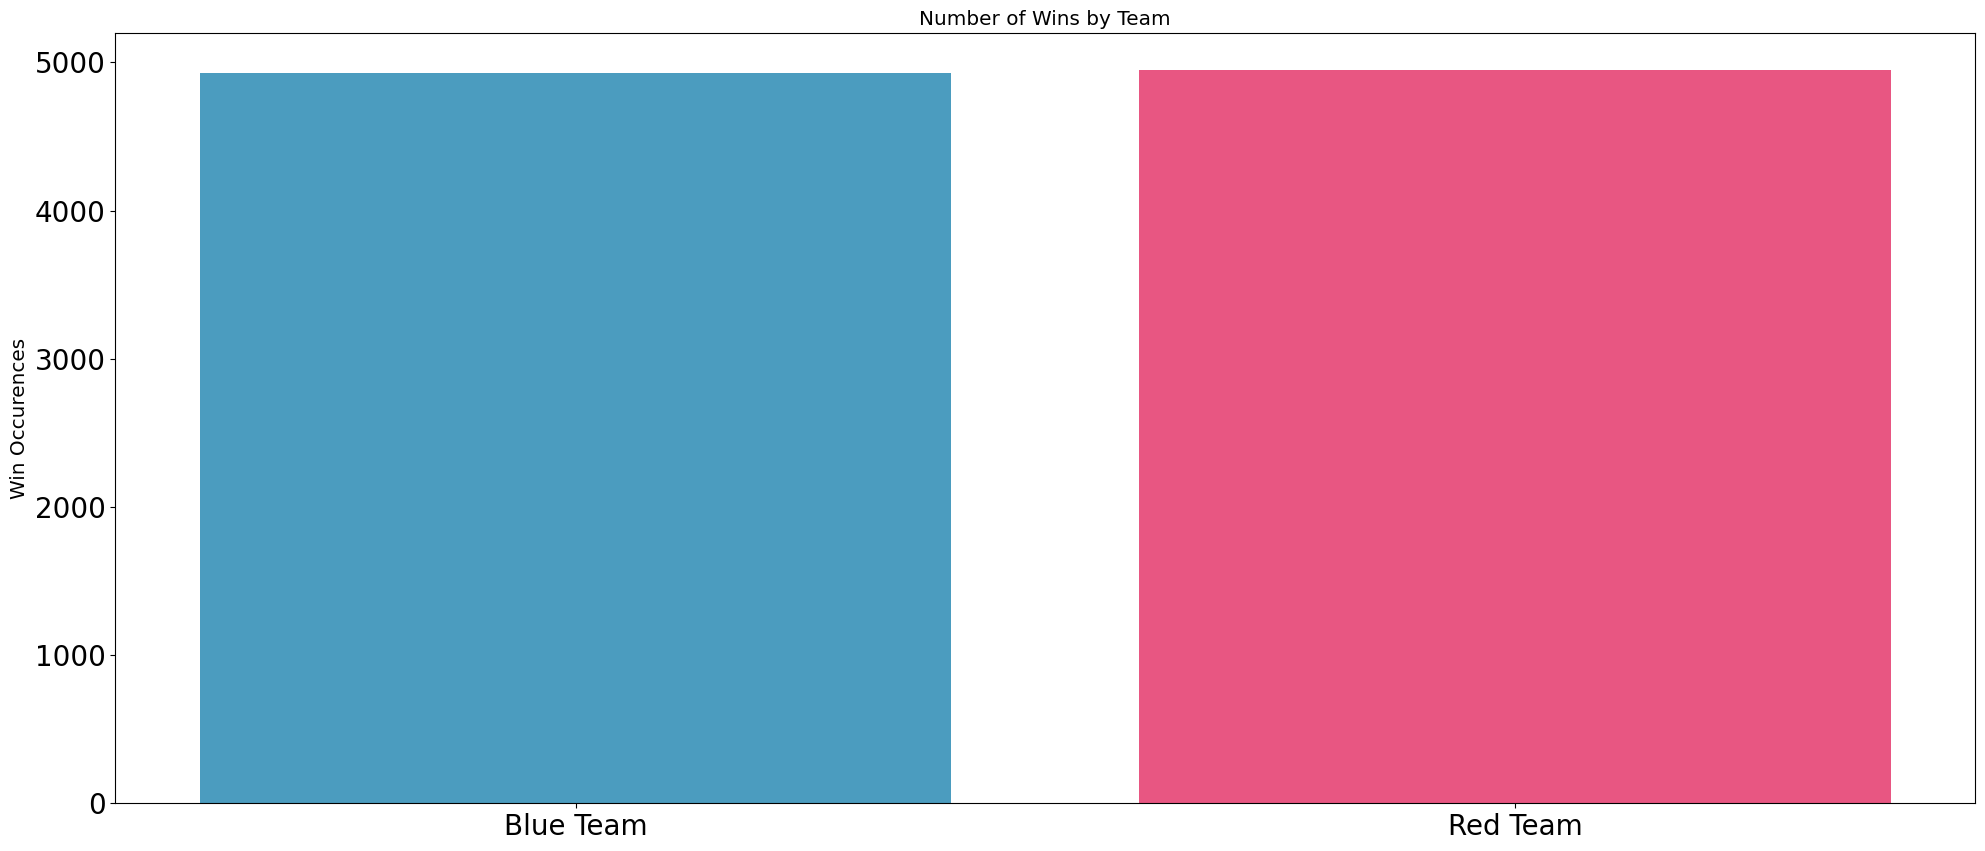

In [9]:
blue_wins = blueside_df['blueWins'].value_counts()[1]
red_wins = redside_df['redWins'].value_counts()[1]

fig = plt.figure(figsize = (24, 10))
plt.bar(['Blue Team', 'Red Team'], [blue_wins, red_wins], color=['#4b9cbf', '#e85682'], )
plt.title("Number of Wins by Team")
plt.ylabel("Win Occurences")
plt.show()

In [10]:
print("Blue team win rate: ", '%.2f'%((blue_wins / allgames_df.shape[0]) * 100), "%")
print("Red team win rate: ", '%.2f'%((red_wins / allgames_df.shape[0]) * 100), "%")

Blue team win rate:  49.90 %
Red team win rate:  50.10 %


As we can see, there's no measurable difference when it comes to blue side win rate versus red side win rate. This makes sense, as high elo players are very familiar with the map and game mechanics. Typically, map side only really impacts game play in lower elos, as lower ranked players are less comfortable with the map and their mechanics. 

### What does vision look like in high elo? 
One highly valuable statistic -- but often undervalued or overlooked in lower elos -- is vision score. The vision score of each player is calculated based on the number of wards placed and the number of wards cleared. Creating and denying vision plays an essential role in creating map pressure and taking objectives. Let's look at what vision in high elo looks like with some histograms. 

First, let's look at the number of wards placed in 10 minutes for both teams.

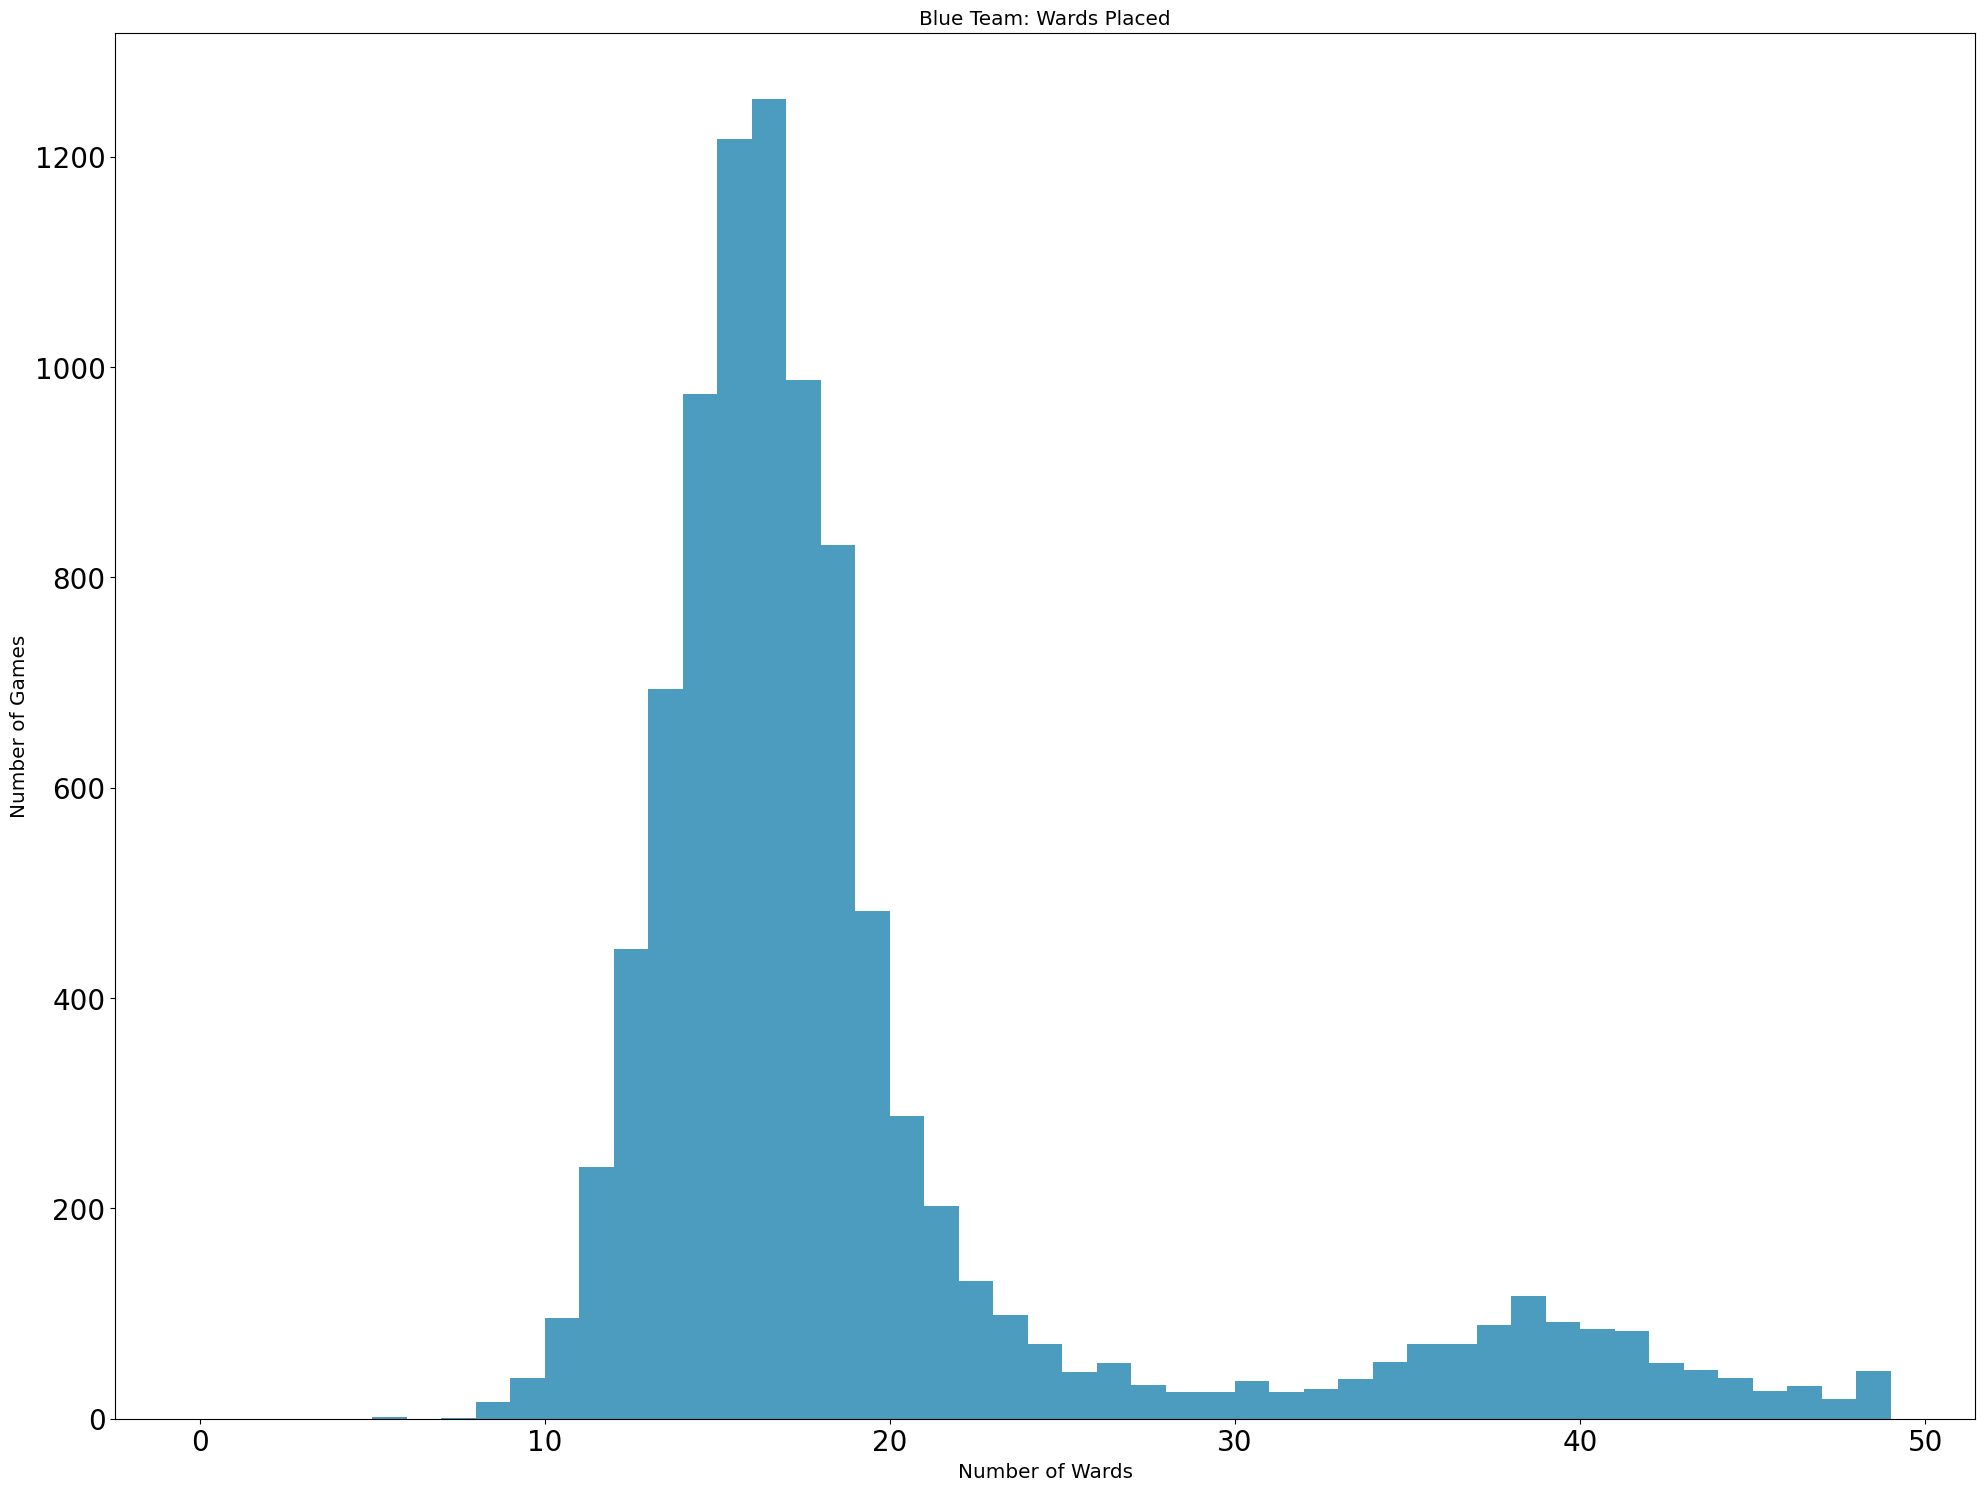

In [11]:
fig = plt.figure(figsize=(24, 18))

plt.title("Blue Team: Wards Placed")
plt.xlabel("Number of Wards")
plt.ylabel("Number of Games")

histogram = plt.hist(blueside_df['blueWardsPlaced'], bins=range(50), color='#4b9cbf')

plt.show()

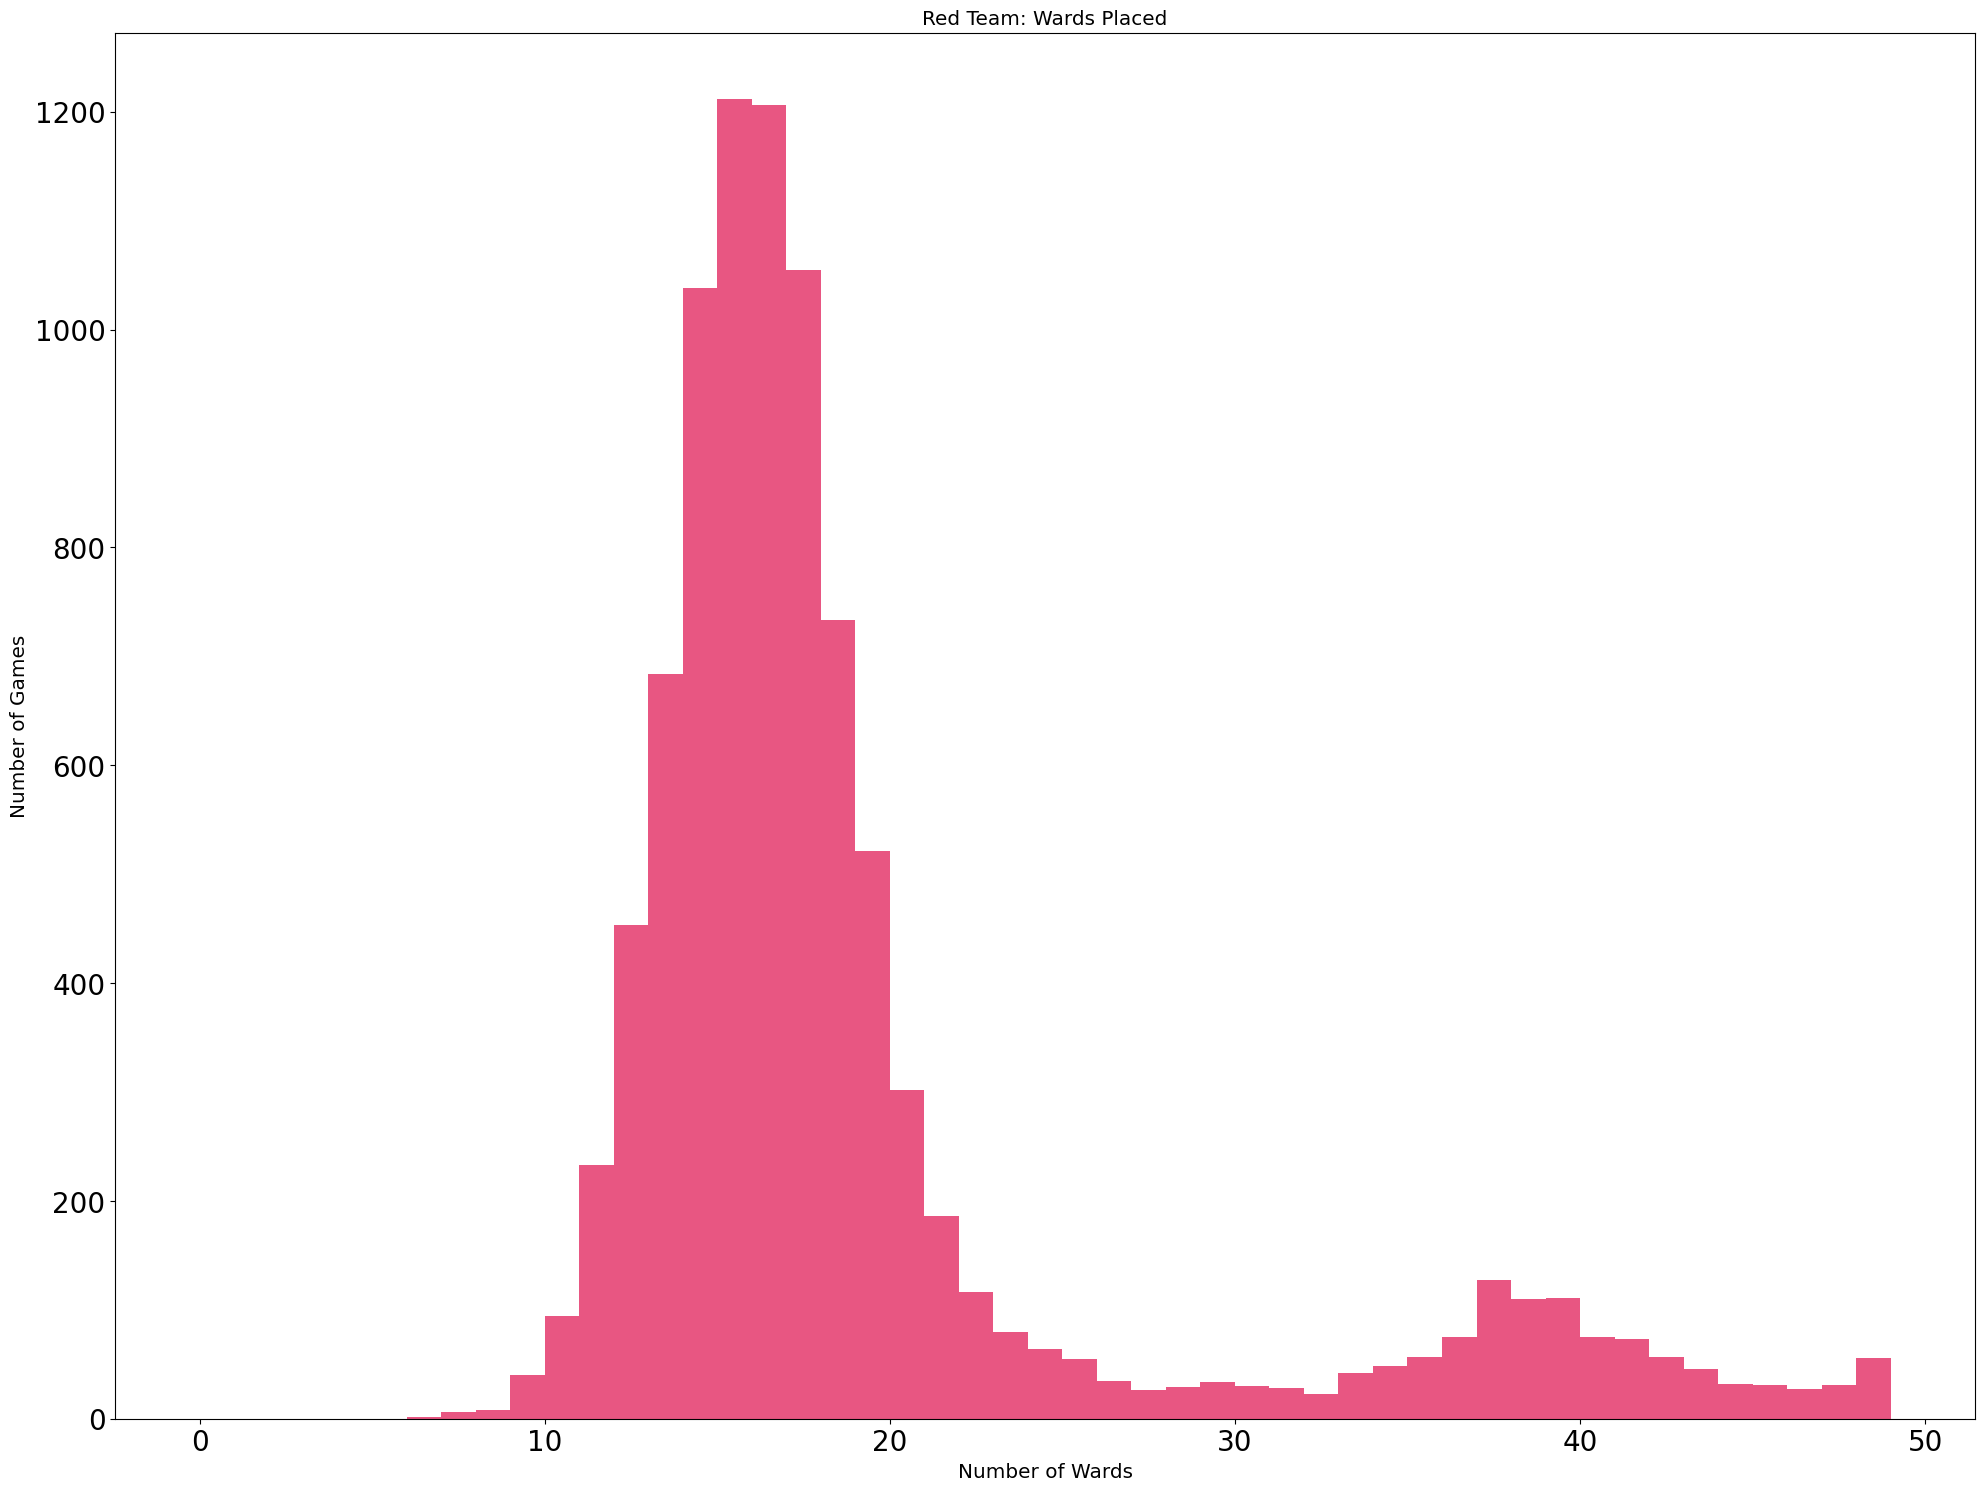

In [12]:
fig = plt.figure(figsize=(24, 18))

plt.title("Red Team: Wards Placed")
plt.xlabel("Number of Wards")
plt.ylabel("Number of Games")

histogram = plt.hist(redside_df['redWardsPlaced'], bins=range(50), color='#e85682')

plt.show()

Now let's look at the number of wards destroyed in 10 minutes for both teams. 

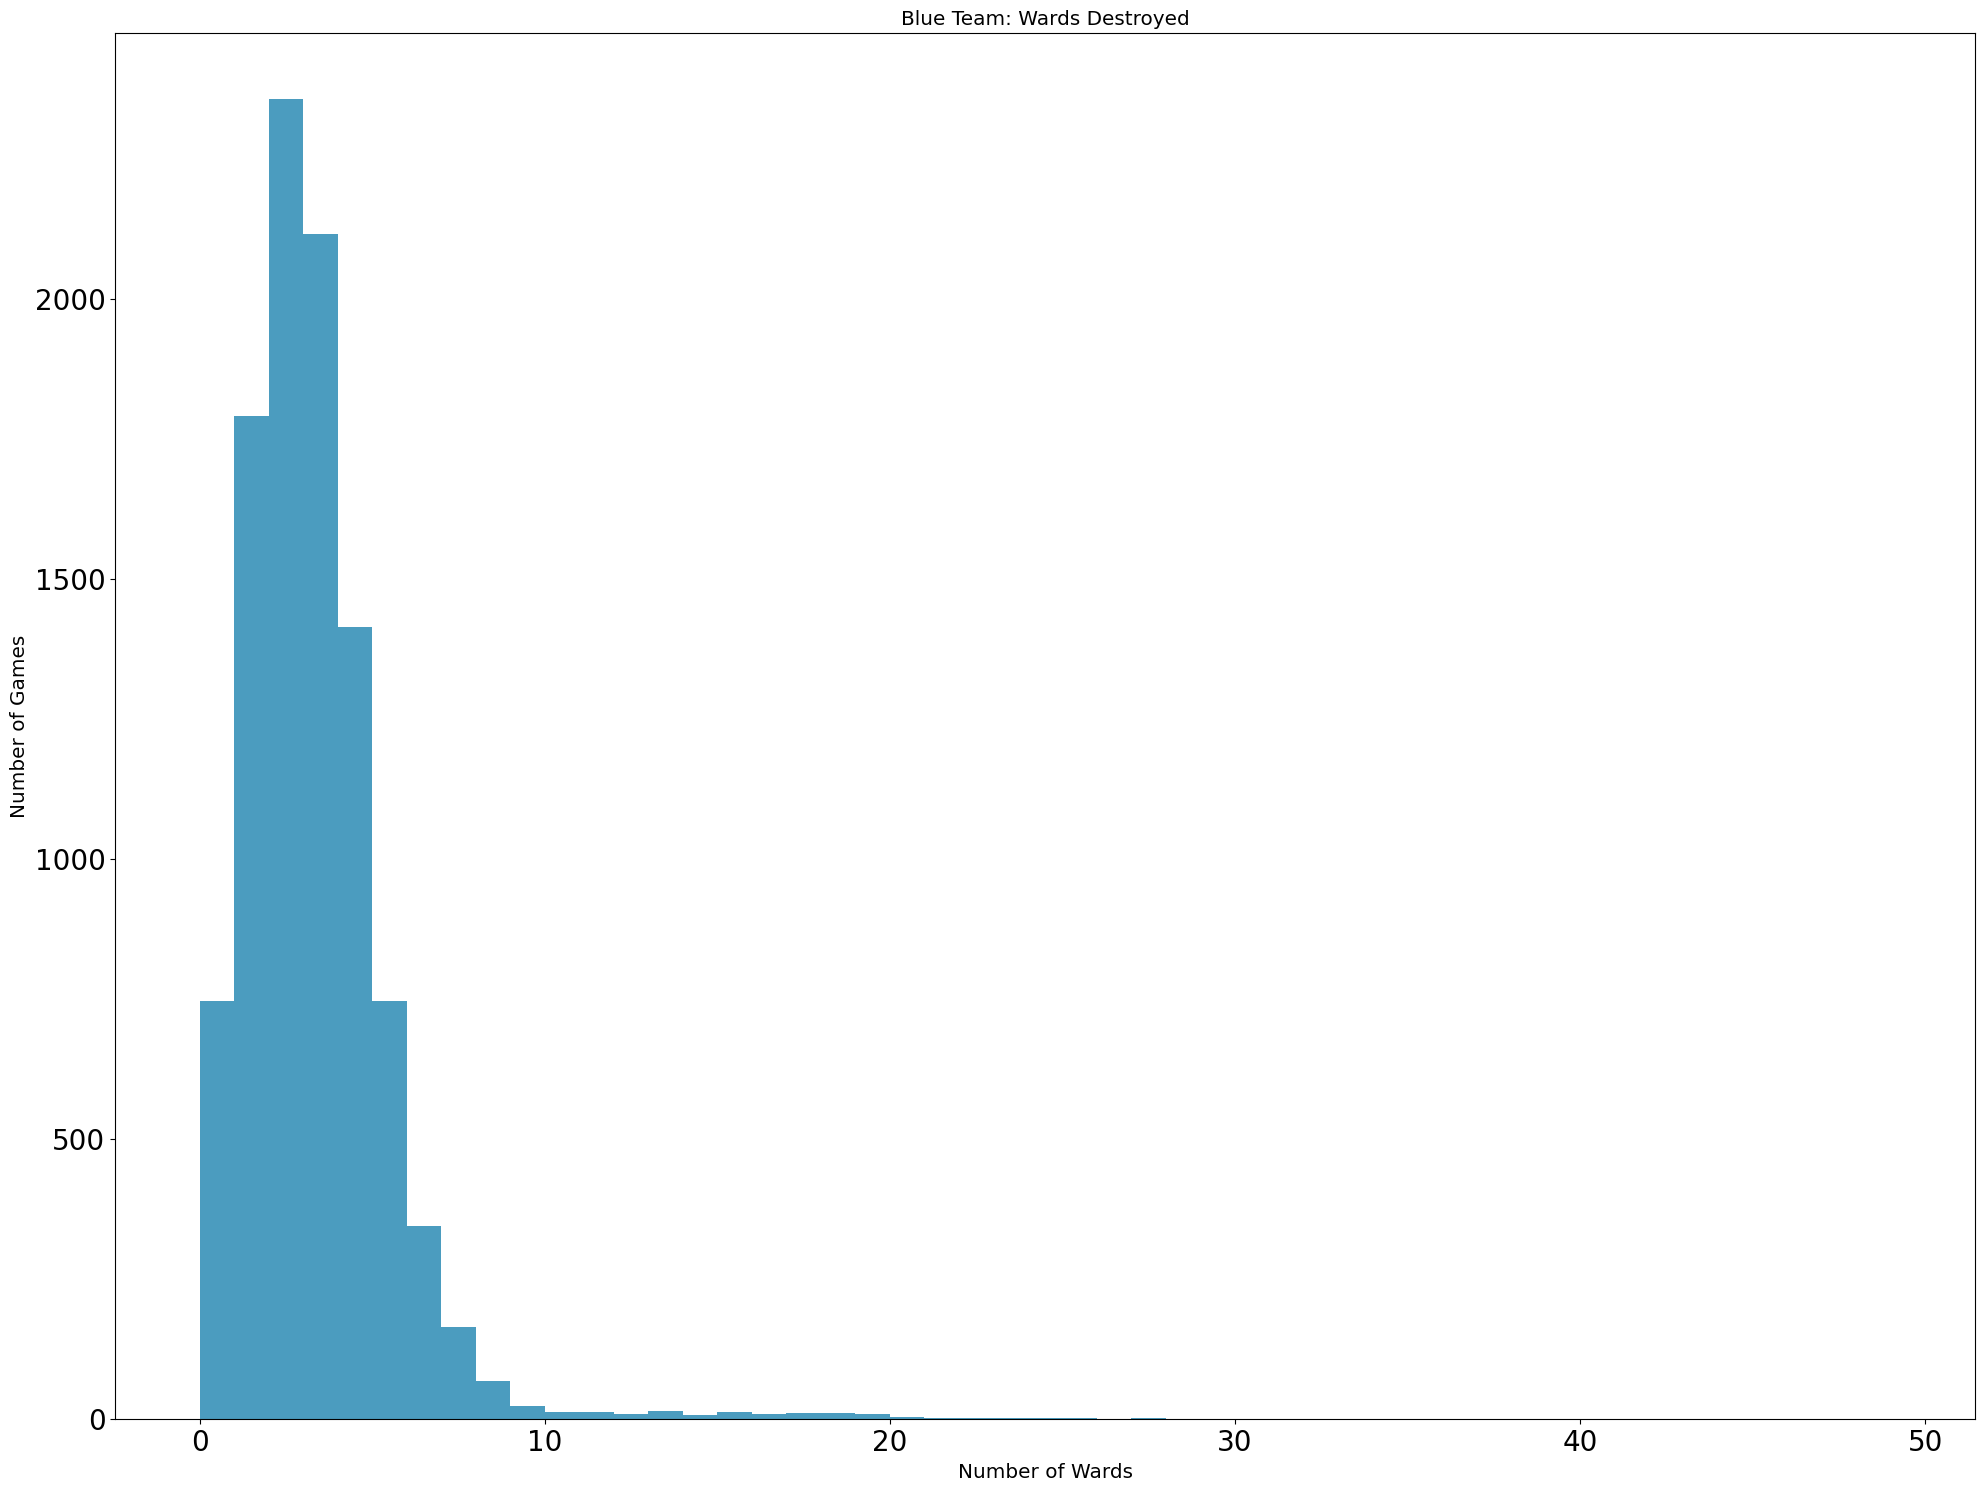

In [13]:
fig = plt.figure(figsize=(24, 18))

plt.title("Blue Team: Wards Destroyed")
plt.xlabel("Number of Wards")
plt.ylabel("Number of Games")

histogram = plt.hist(blueside_df['blueWardsDestroyed'], bins=range(50), color='#4b9cbf')

plt.show()

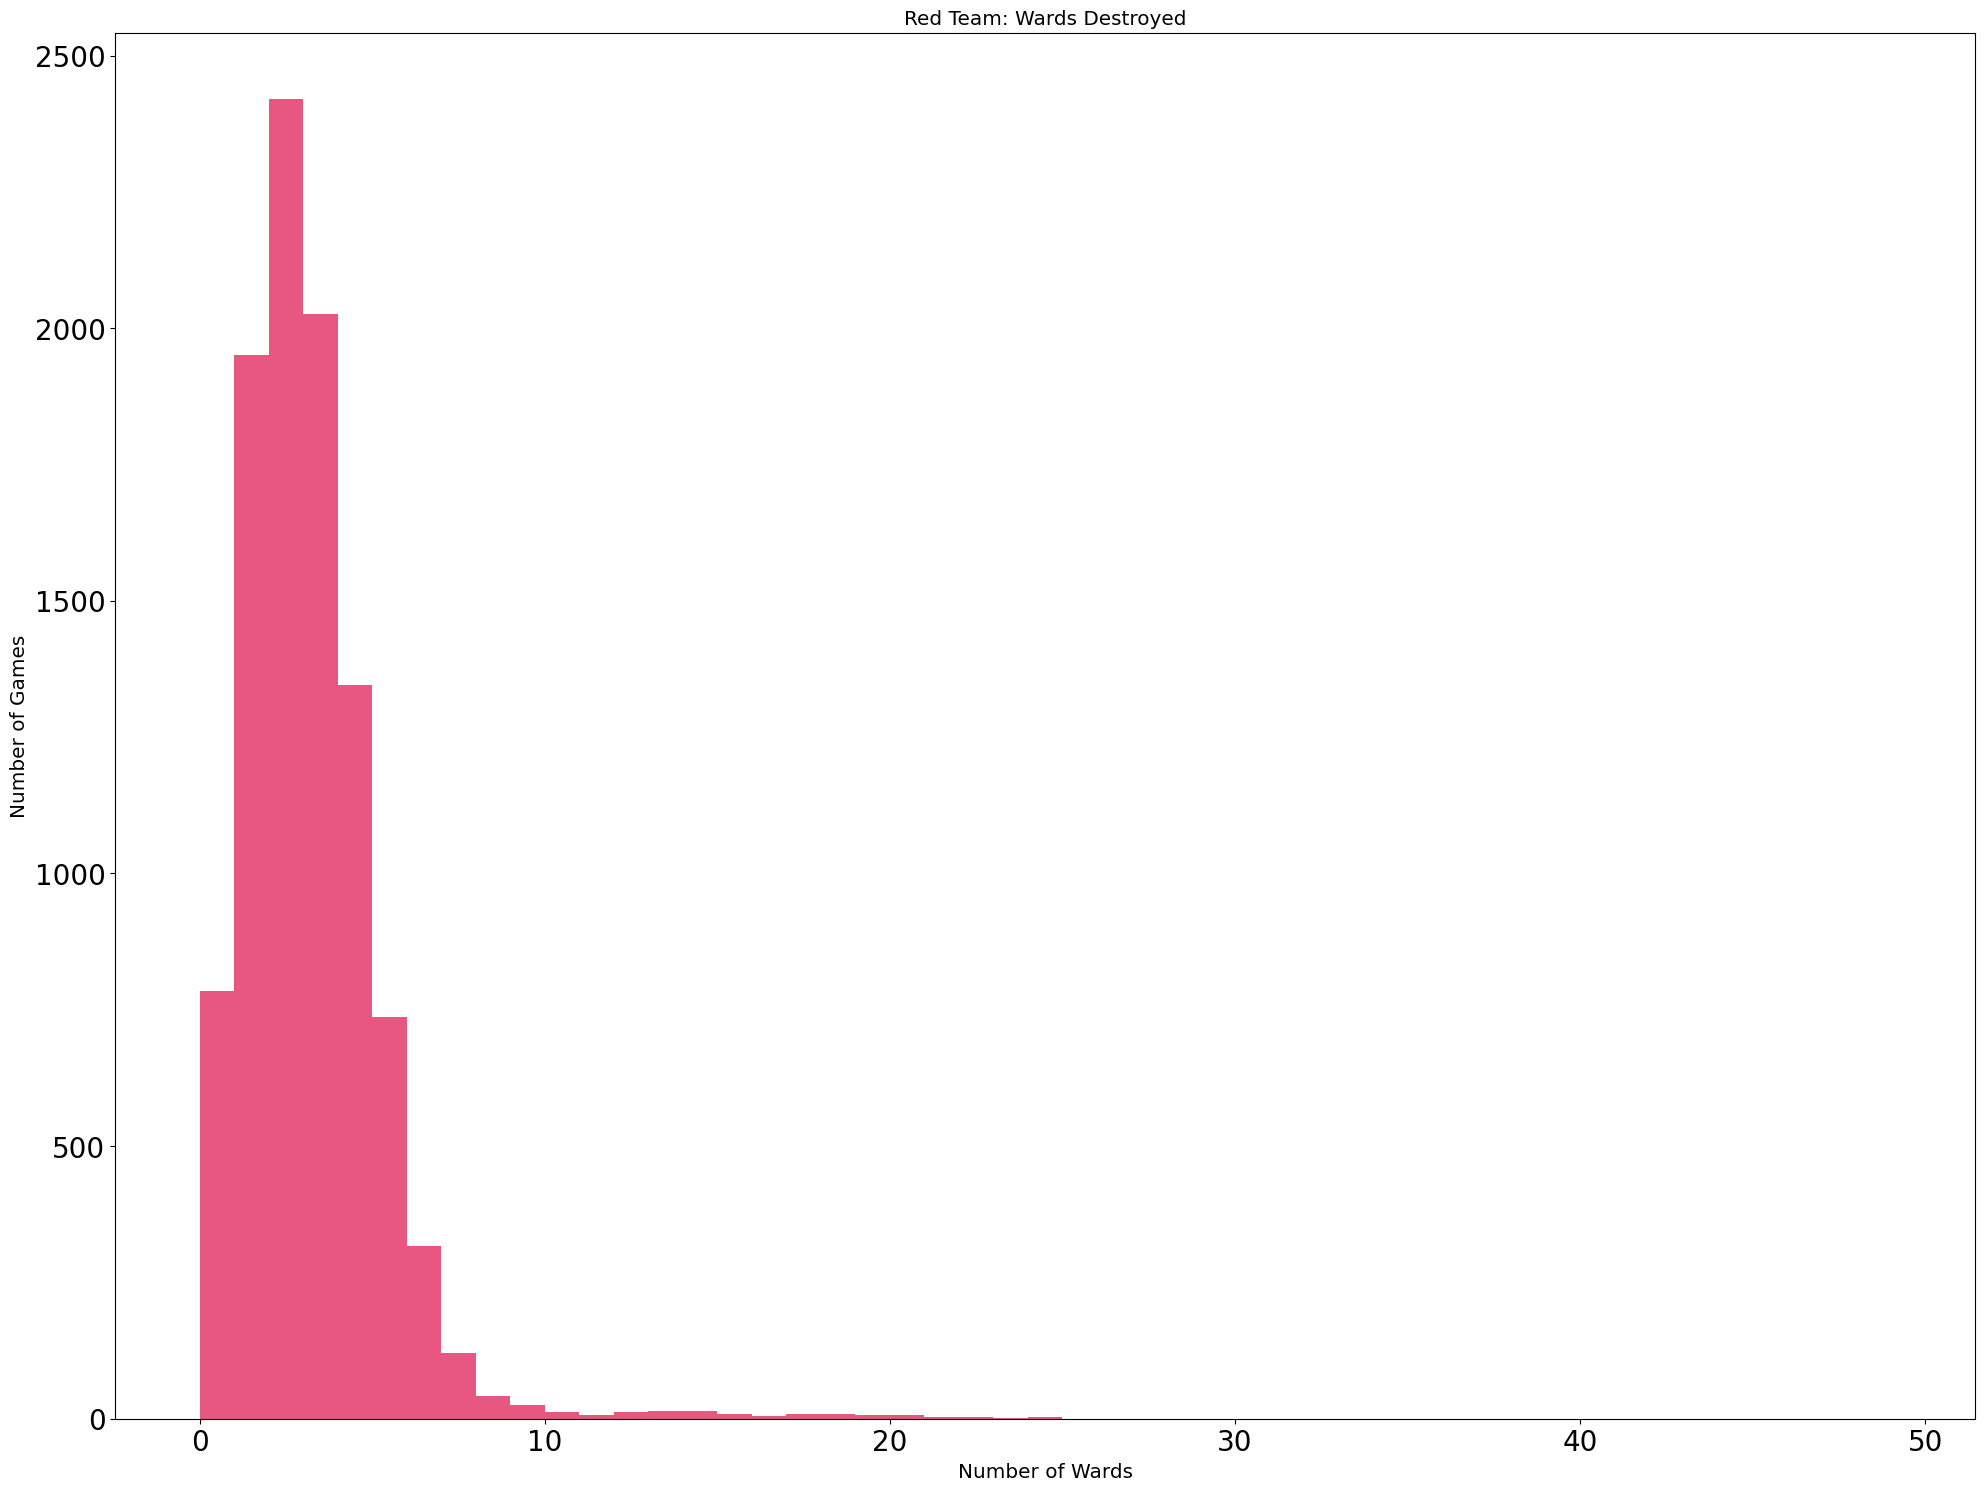

In [14]:
fig = plt.figure(figsize=(24, 18))

plt.title("Red Team: Wards Destroyed")
plt.xlabel("Number of Wards")
plt.ylabel("Number of Games")

histogram = plt.hist(redside_df['redWardsDestroyed'], bins=range(50), color='#e85682')

plt.show()

As we can see, it's pretty equal between both teams! This makes sense, as high elo players understand the importance of vision in League.

The number of wards destroyed is typically lower than wards placed. We can see that most games have about 15-18 wards placed and 3 wards destroyed at 10 minutes. 

### What does KDA look like for winners and losers? 
Next, let's take a look at what the average KDA ratio (kill/death/assist) looks like on a winning team and on a losing team. The KDA ratio is calculated by ((kills + assists) / deaths). Typically, a KDA greater than 1 indicates good performance. 

We will first need to aggregate the data. 

In [46]:
cols = ["blueKills", "blueDeaths", "blueAssists"]
blue_grouped_df = blueside_df.groupby('blueWins')[cols].mean()
blue_grouped_df["KDA"] = round((blue_grouped_df[cols[0]] + blue_grouped_df[cols[2]])/(blue_grouped_df[cols[1]]),2)
blue_grouped_df.drop(cols, inplace=True, axis=1)
blue_grouped_df.head()

,KDA
blueWins,
0,1.50
1,2.91


For teams on the blue side, the average KDA is 1.50 after losing and 2.91 after winning.

In [16]:
cols = ["redKills", "redDeaths", "redAssists"]
red_grouped_df = redside_df.groupby('redWins')[cols].mean()
red_grouped_df["KDA"] = round((red_grouped_df[cols[0]] + red_grouped_df[cols[2]])/(red_grouped_df[cols[1]]), 2)
red_grouped_df.drop(cols, inplace=True, axis=1)
red_grouped_df.head()

,KDA
redWins,
0,1.49
1,2.88


For teams on the red side, the average KDA is 1.49 after losing and 2.88 after winning.

As we can see, typically winning teams have higher KDA ratios. This makes sense, as more kills & assists and less deaths lead to greater gold, experience, and time on the map to positively impact the game. 

However, the difference between winning and losing teams' KDA ratios is not that great, suggesting that KDA might not be the best indicator of whether a team will win or lose. 

### What does the relationship between average level & KDA look like? 
Now let's take a closer look at KDA ratios by grouping by average levels. 

In [52]:
cols = ["blueKills", "blueDeaths", "blueAssists"]
blue_grouped_df = blueside_df.groupby('blueAvgLevel', as_index=False)[cols].mean().round(2)
blue_grouped_df["KDA"] = (blue_grouped_df[cols[0]] + blue_grouped_df[cols[2]])/(blue_grouped_df[cols[1]])
blue_grouped_df.sort_values(by="KDA")
blue_grouped_df.head()

,blueAvgLevel,blueKills,blueDeaths,blueAssists,KDA
0,4.6,4.00,11.00,4.0,0.727273
1,4.8,1.00,12.00,0.0,0.083333
2,5.2,4.50,16.50,5.5,0.606061
3,5.4,2.33,13.67,3.0,0.389905
4,5.6,5.25,11.00,5.5,0.977273


In [53]:
cols = ["redKills", "redDeaths", "redAssists"]
red_grouped_df = redside_df.groupby('redAvgLevel', as_index=False)[cols].mean().round(2)
red_grouped_df["KDA"] = (red_grouped_df[cols[0]] + red_grouped_df[cols[2]])/(red_grouped_df[cols[1]])
red_grouped_df.sort_values(by="KDA")
red_grouped_df.head()

,redAvgLevel,redKills,redDeaths,redAssists,KDA
0,4.8,4.0,7.5,4.50,1.133333
1,5.0,3.0,14.0,2.00,0.357143
2,5.2,4.0,13.0,8.00,0.923077
3,5.4,2.0,6.0,1.67,0.611667
4,5.6,2.8,8.4,1.60,0.523810


Interesting! Now let's create some bar charts. 

In [54]:
fig = px.bar(blue_grouped_df, x='blueAvgLevel', y='KDA', 
             color='blueAvgLevel', color_continuous_scale=px.colors.sequential.Blues)
fig.show()

In [55]:
fig = px.bar(red_grouped_df, x='redAvgLevel', y='KDA', 
             color='redAvgLevel', color_continuous_scale=px.colors.sequential.RdPu)
fig.show()

As we can see, there is a positive correlation between the team's average level at 10 minutes and the team's KDA ratio. This makes sense, as typically teams who are performing better will reach higher levels quicker.

### How does the number of deaths impact the total gold earned? 
From the visualizations and analysis we've done so far, we know that gold is a crucial part in securing a win in League. Let's take a look at the relationship between the number of deaths and the total gold earned by a team. 

In [81]:
blue_df = blueside_df.groupby('blueDeaths', as_index=False)["blueTotalGold"].mean().round(2)
blue_df["team"] = ["blue"] * blue_df.shape[0]
blue_df.rename(columns={'blueDeaths':'deaths', 'blueTotalGold':'totalGold'}, inplace=True)

red_df = redside_df.groupby('redDeaths', as_index=False)["redTotalGold"].mean().round(2)
red_df["team"] = ["red"] * red_df.shape[0]
red_df.rename(columns={'redDeaths':'deaths', 'redTotalGold':'totalGold'}, inplace=True)

combined = pd.concat([blue_df, red_df], axis=0)
combined.head()

,deaths,totalGold,team
0,0,17050.92,blue
1,1,17049.50,blue
2,2,16831.99,blue
3,3,16760.20,blue
4,4,16689.40,blue


In [82]:
fig = px.line(new, x='deaths', y='totalGold', color="team")
fig.show()

From this data visualization, it's clear that there is a negative correlation between total gold at 10 minutes and total deaths; the more times a player dies, the less time they have on the map to earn gold -- whether it's through killing minions or obtaining objectives. 

### What does the relationship between CS per minute and total gold & experience look like? 
Let's create aggregate our data and create a scatter plot!  

In [86]:
blue_df = blueside_df.groupby('blueCSPerMin', as_index=False)[["blueTotalGold", "blueTotalExperience"]].mean().round(2)
blue_df["team"] = ["blue"] * blue_df.shape[0]
blue_df.rename(columns={'blueCSPerMin':'csPerMin', 'blueTotalGold':'totalGold', 'blueTotalExperience':'totalExperience'}, inplace=True)

red_df = redside_df.groupby('redCSPerMin', as_index=False)[["redTotalGold", "redTotalExperience"]].mean().round(2)
red_df["team"] = ["red"] * red_df.shape[0]
red_df.rename(columns={'redCSPerMin':'csPerMin', 'redTotalGold':'totalGold', 'redTotalExperience':'totalExperience'}, inplace=True)

combined = pd.concat([blue_df, red_df], axis=0)
combined.head()

,csPerMin,totalGold,totalExperience,team
0,9.0,14416.0,11286.0,blue
1,12.0,12178.0,10098.0,blue
2,12.3,13742.0,12556.0,blue
3,13.0,13462.0,12212.0,blue
4,13.1,15898.0,14230.0,blue


In [87]:
fig = px.scatter(combined, x="csPerMin", y="totalGold", color="team")
fig.show()

In [88]:
fig = px.scatter(combined, x="csPerMin", y="totalExperience", color="team")
fig.show()

Again, we can see a positive correlation between CS per minute and total gold/experience! 

### What features best indicate win condition?
Now let's create some seaborn heatmap visualizations. This visualization highlights how strongly features correlate with each other. Darker colors indicate stronger correlation, and positive correlation is indicated with blue while negative correlation is indicated with pink.

Here's the code for creating a heat map:

In [19]:
def create_heatmap(dataframe):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    sns.heatmap(dataframe.corr(), annot=True, fmt='.2f', cmap=cmap)
    sns.set(font_scale=1.4)

Let's create the heat map for the blue side data: 

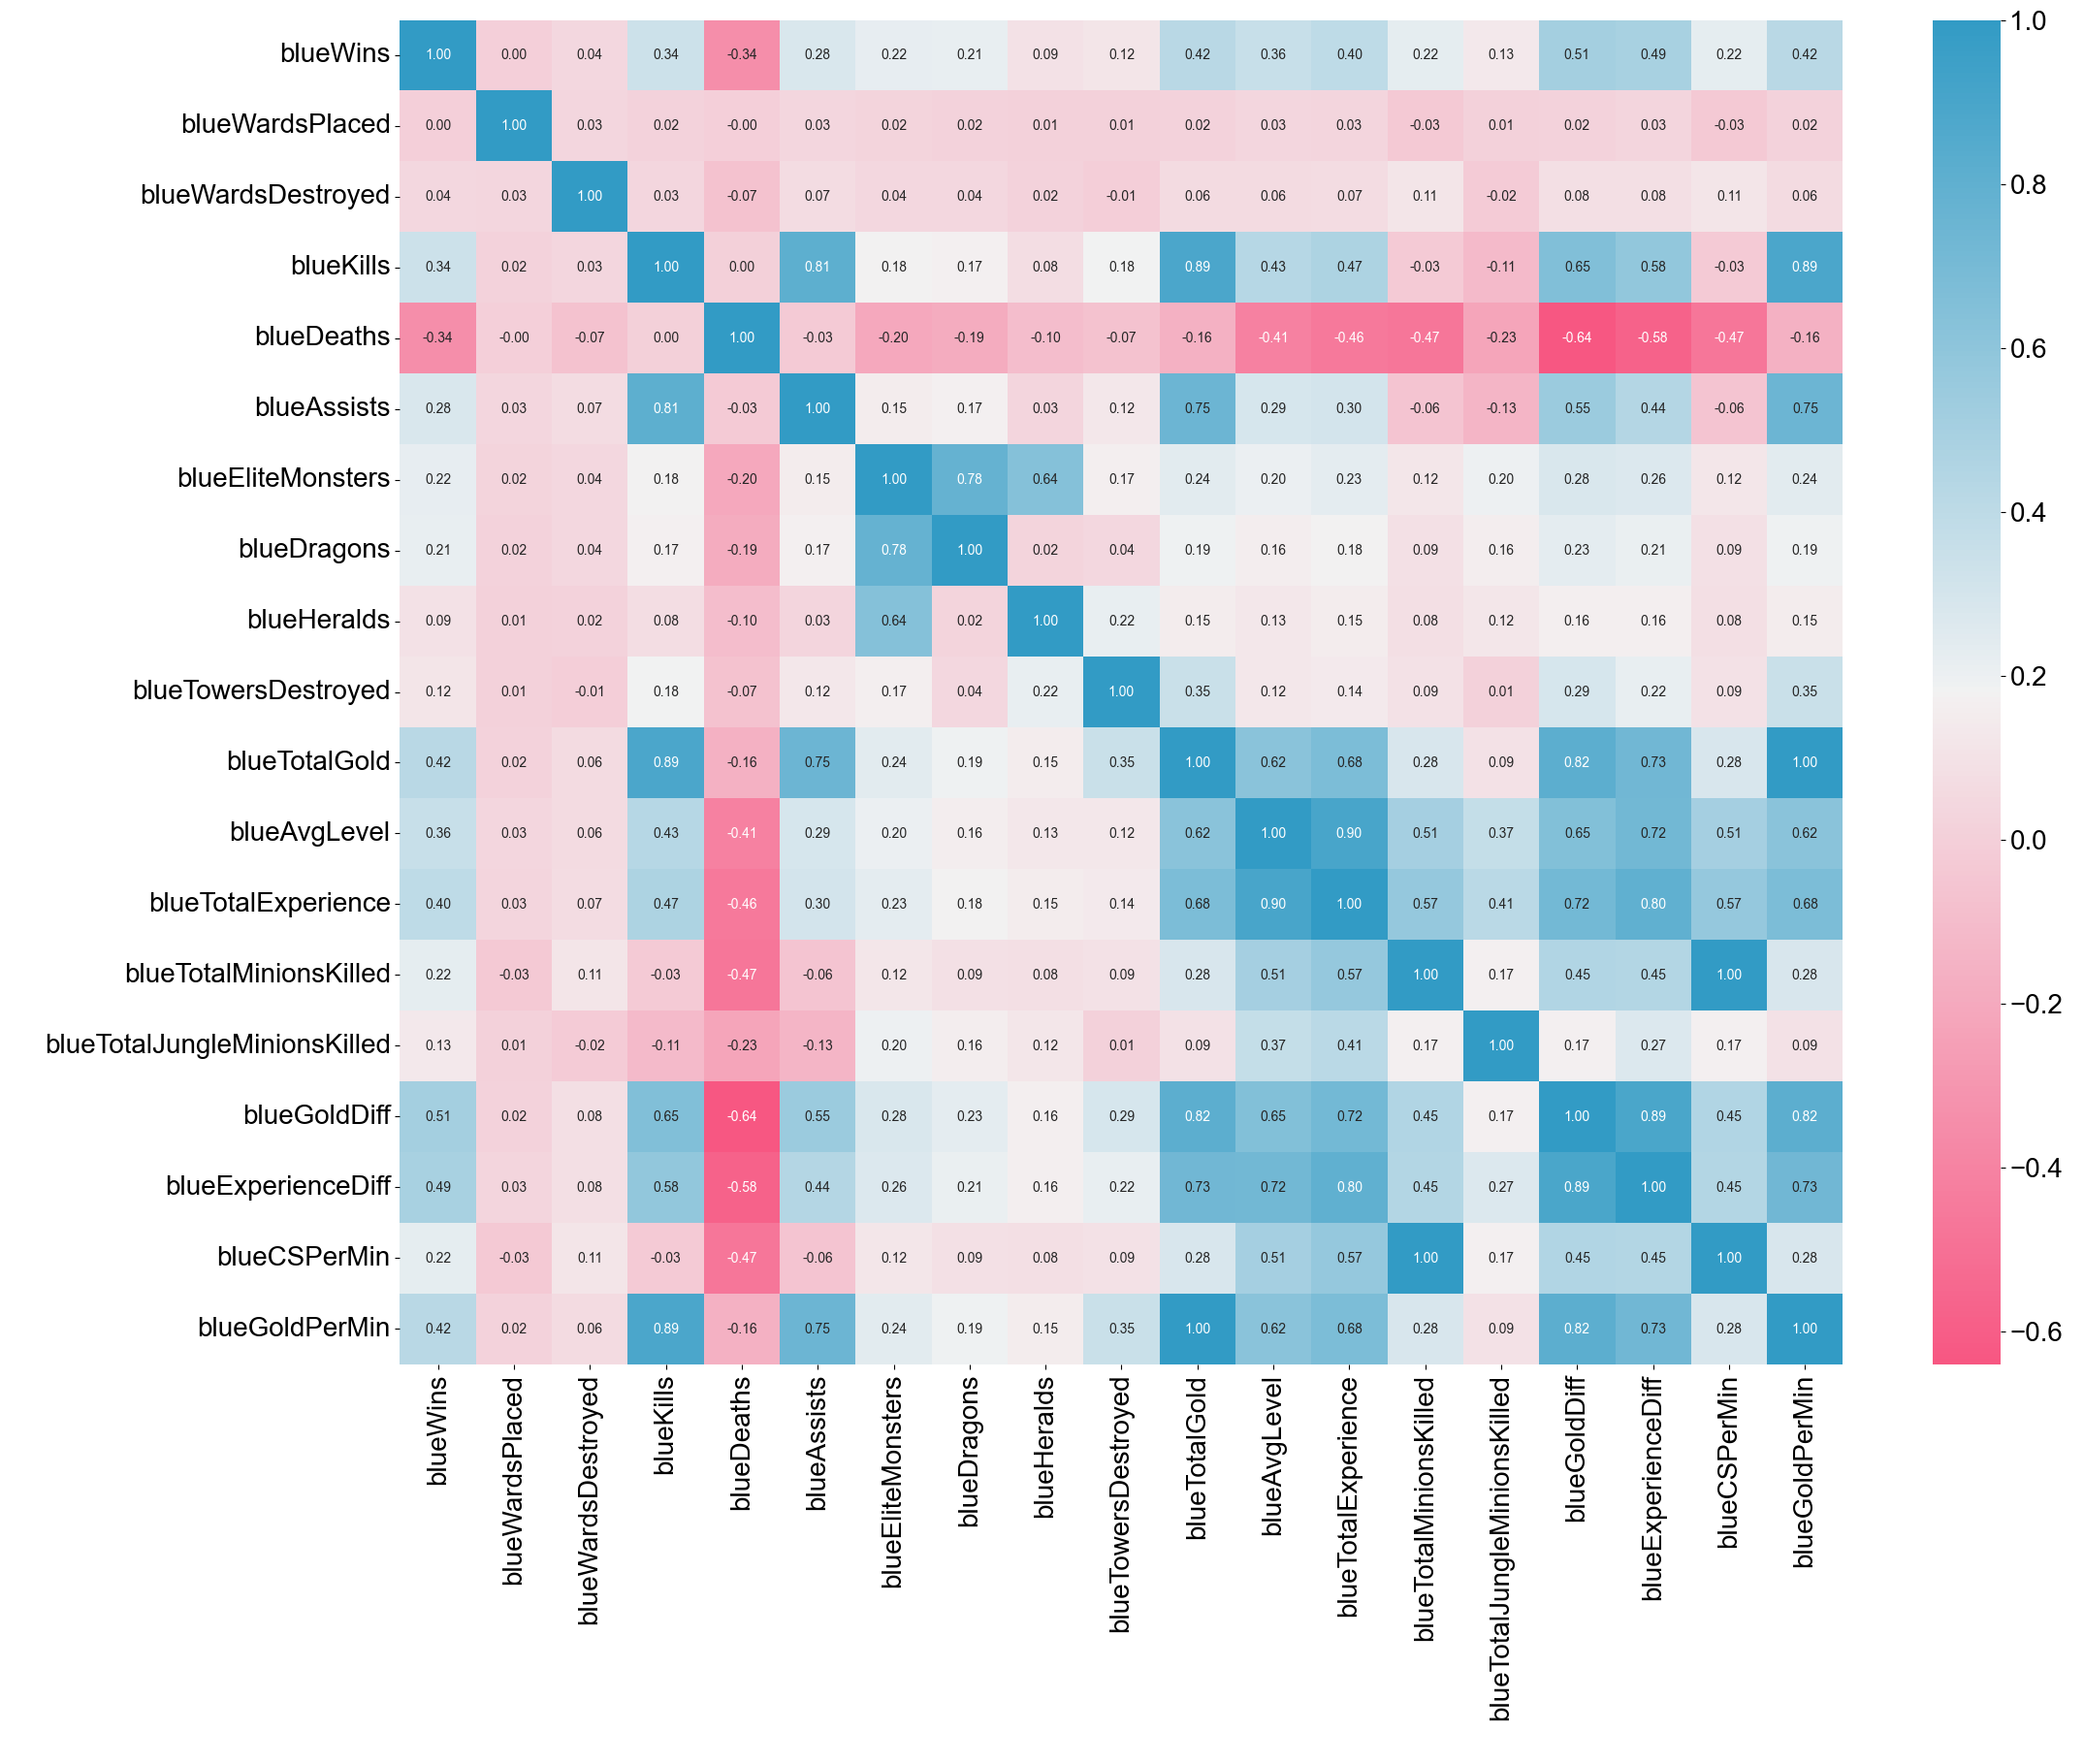

In [20]:
fig, ax = plt.subplots(figsize=(24, 18))
create_heatmap(blueside_df)
plt.show()

Let's create the heat map for the red side: 

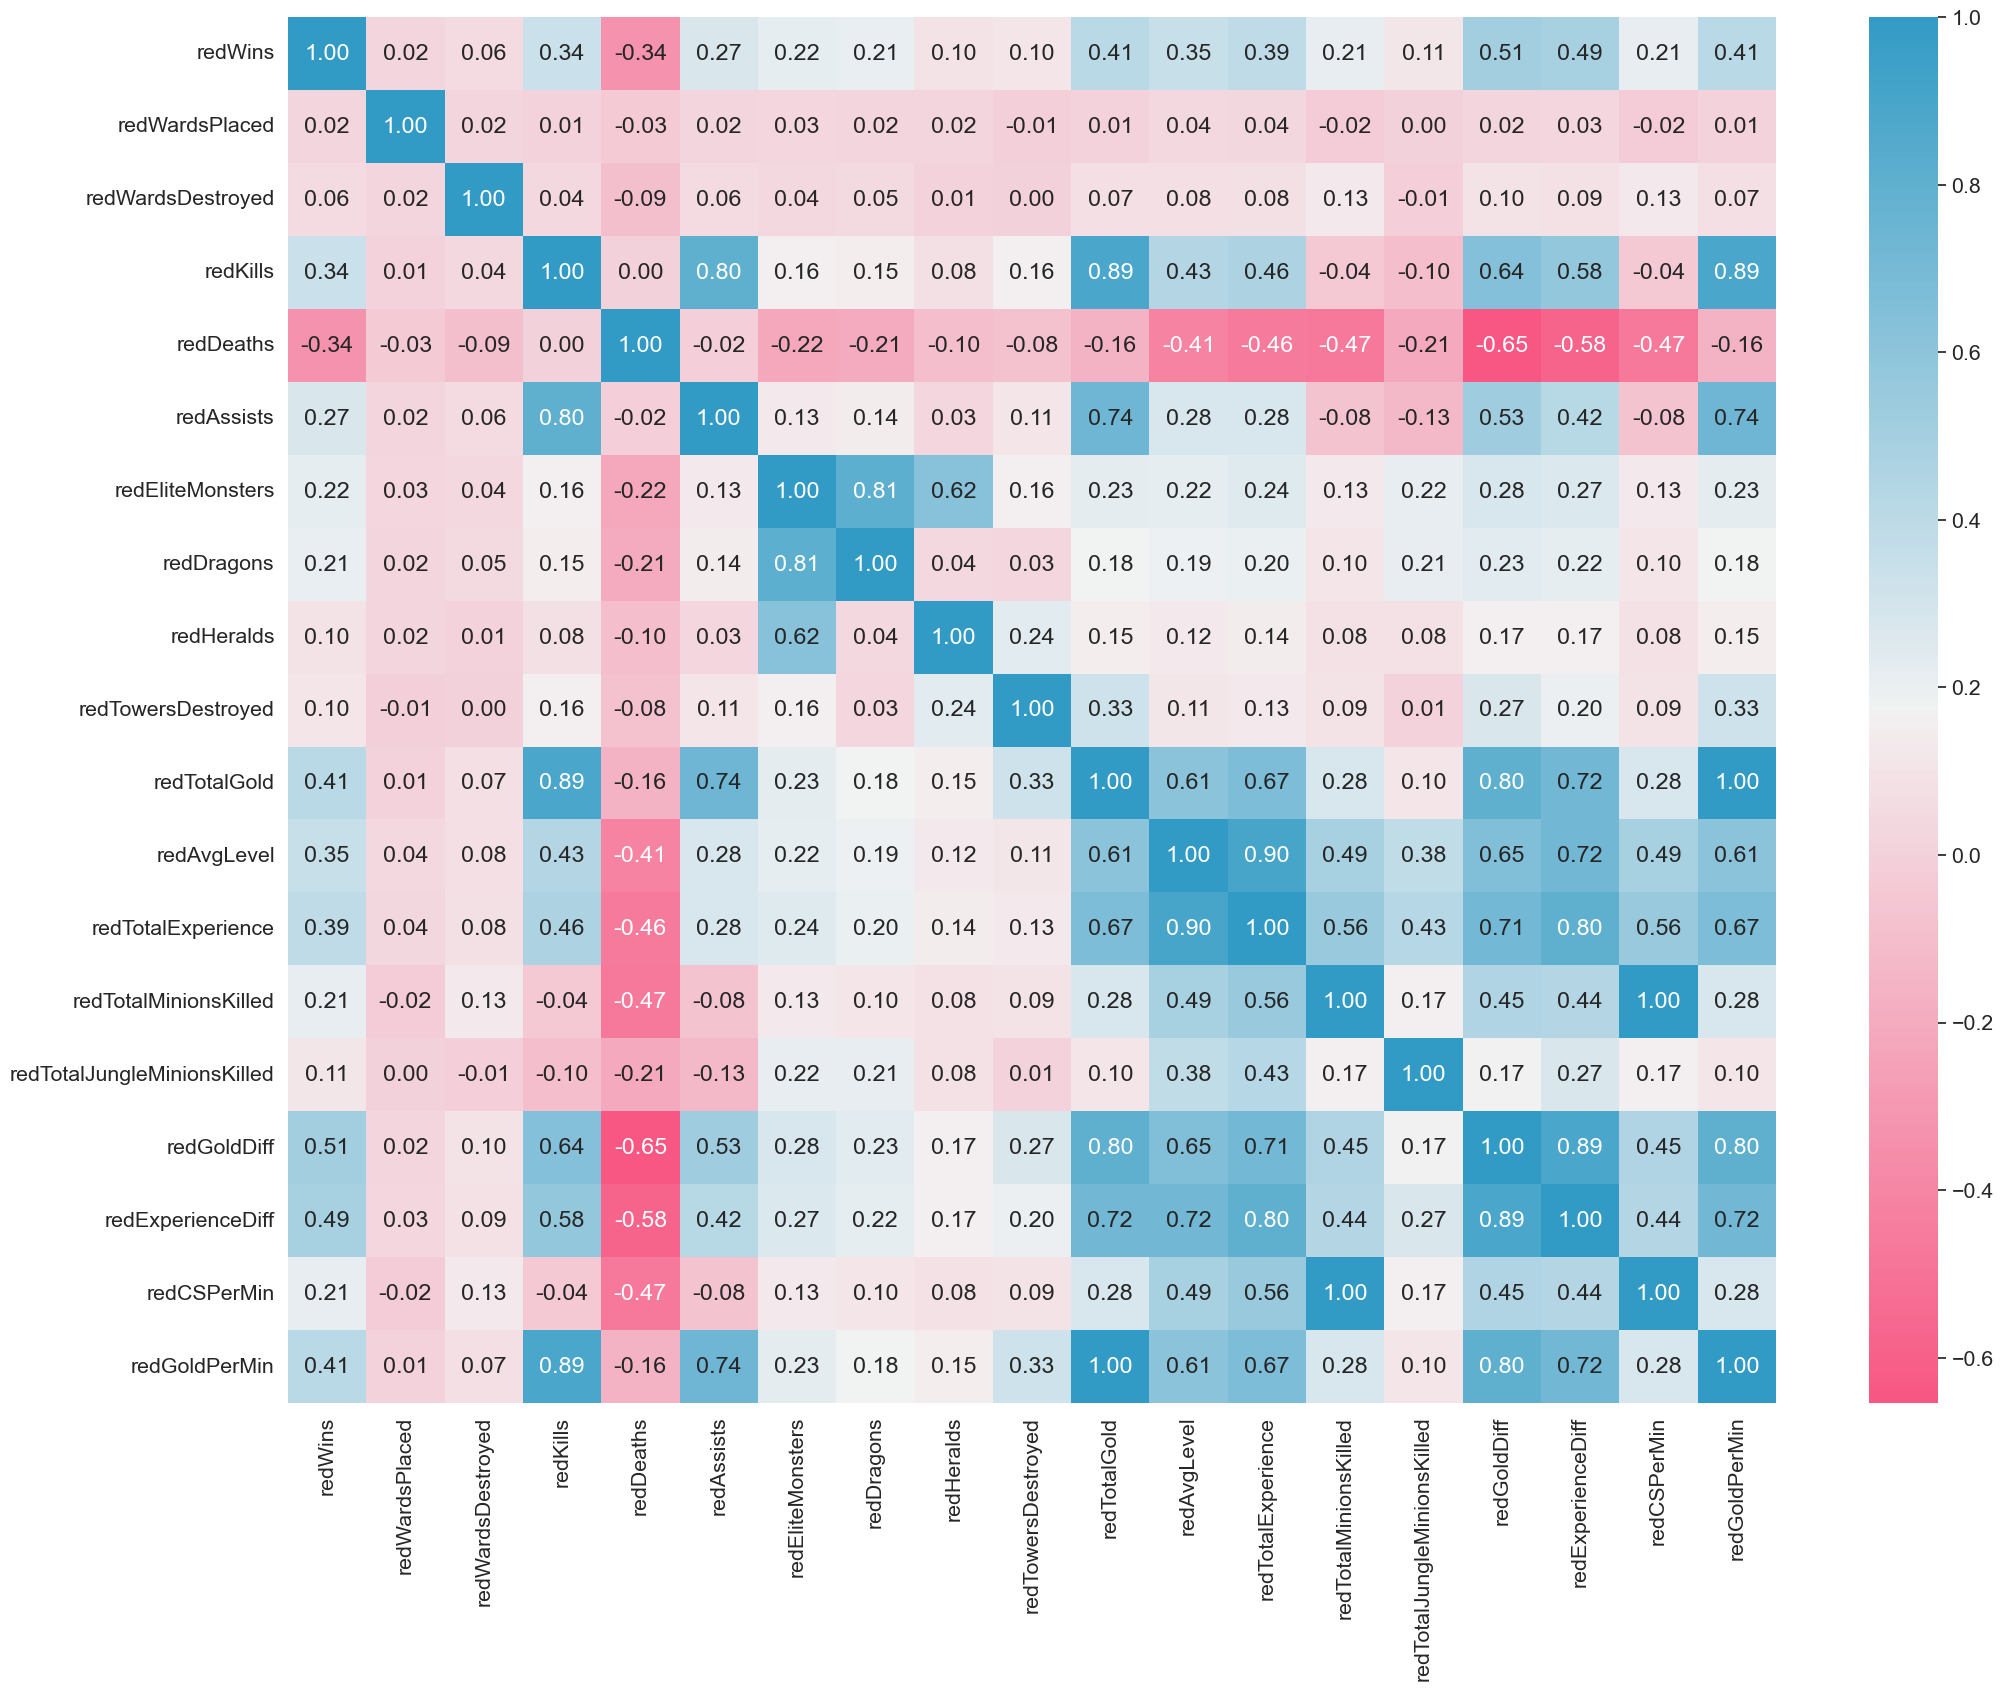

In [21]:
fig, ax = plt.subplots(figsize=(24, 18))
create_heatmap(redside_df)
plt.show()

From these visualizations, we can see a few trends right away: 

* There is generally a strong positive correlation between total gold, average level, total experience, and minions killed as the bottom right corner of the heatmap is pretty blue 

* Number of deaths negatively correlates with average level, total experience, minions killed, gold diff, and experience diff 

* Gold, experience, and number of deaths are good indicators of a game's result 

These observations make sense with our understanding of the game; gold, experience, and minions killed go hand-in-hand, and more time spent dead means less time to create map pressure, take objectives, and earn gold and experience. 

## Feature Selection
Now that we've gained a better understanding of which features may impact game play, let's take a closer look at the features through mutual information score analysis 

Here's the function for generating and plotting mutual information scores. 

In [22]:
def make_mi_scores(X, y, discrete_features):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category', 'float64']):
        X[colname], _ = X[colname].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(side, scores): 
    set_color = "#4b9cbf" if side == "Blue Side" else "#e85682"
    
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.bar(width, scores, width=0.8, color=set_color)
    plt.xticks(width, ticks, size=10, rotation=40)
    plt.yticks(size=20)
    plt.title(side + " Mutual Information Scores", fontdict={'fontsize':20})

Let's generate the scores for the blue side! 

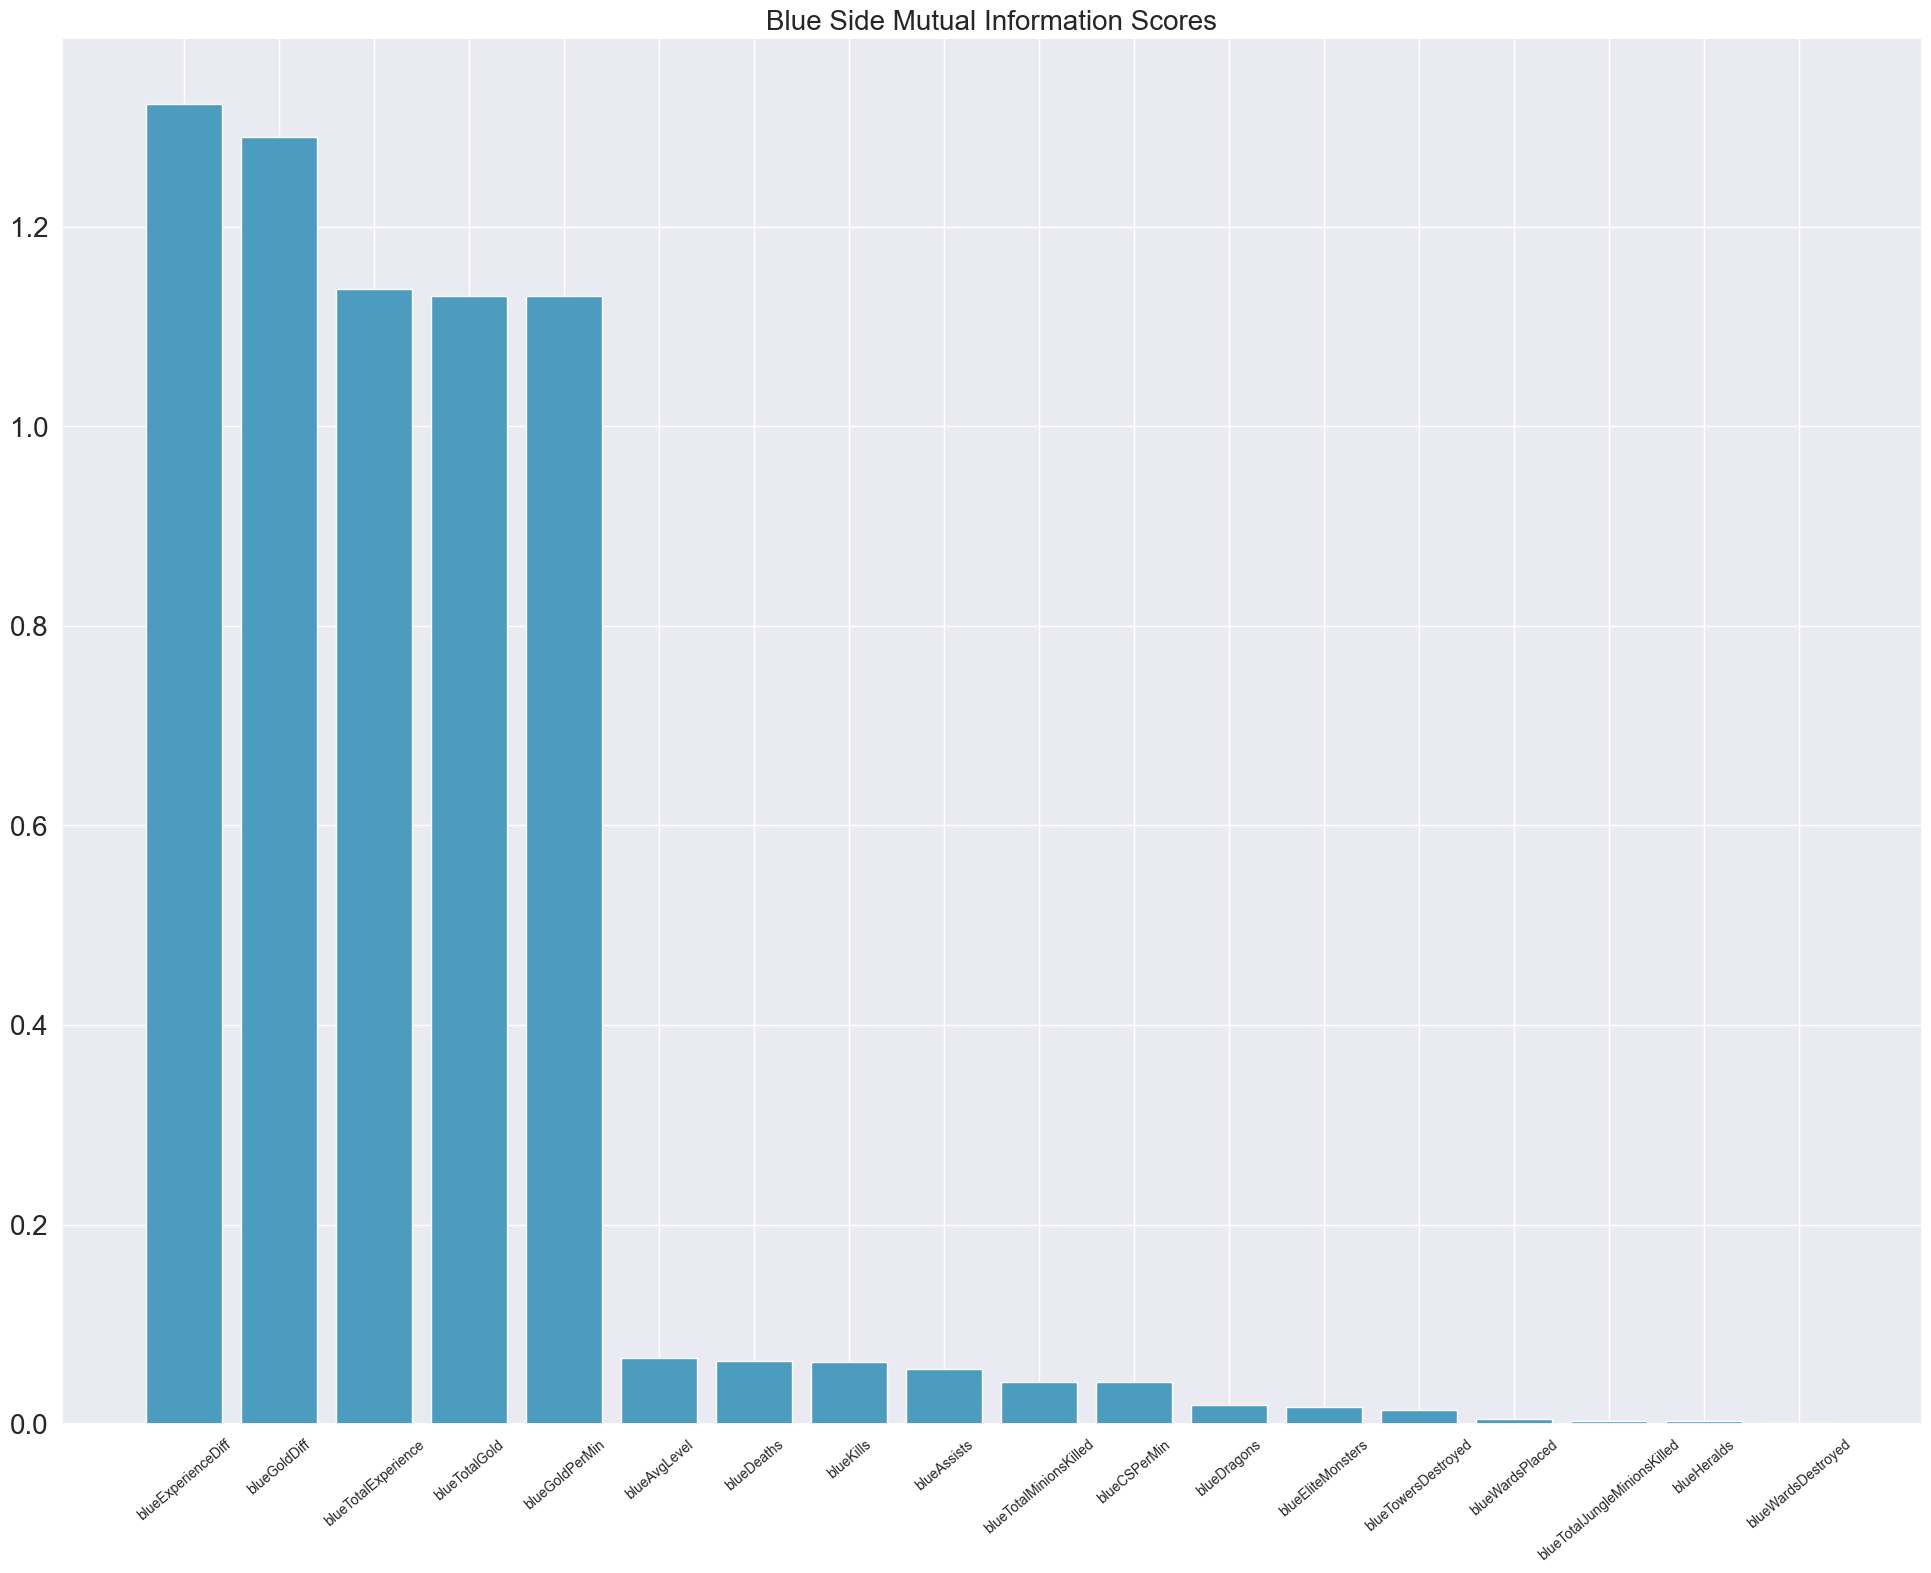

In [23]:
X = blueside_df.copy(deep=True)
y = X.pop('blueWins')
discrete_features = X.dtypes

plt.figure(dpi=100, figsize=(24, 18))

blue_mi_scores = make_mi_scores(X, y, discrete_features)
plot_mi_scores("Blue Side", blue_mi_scores)

Let's generate the scores for the red side!

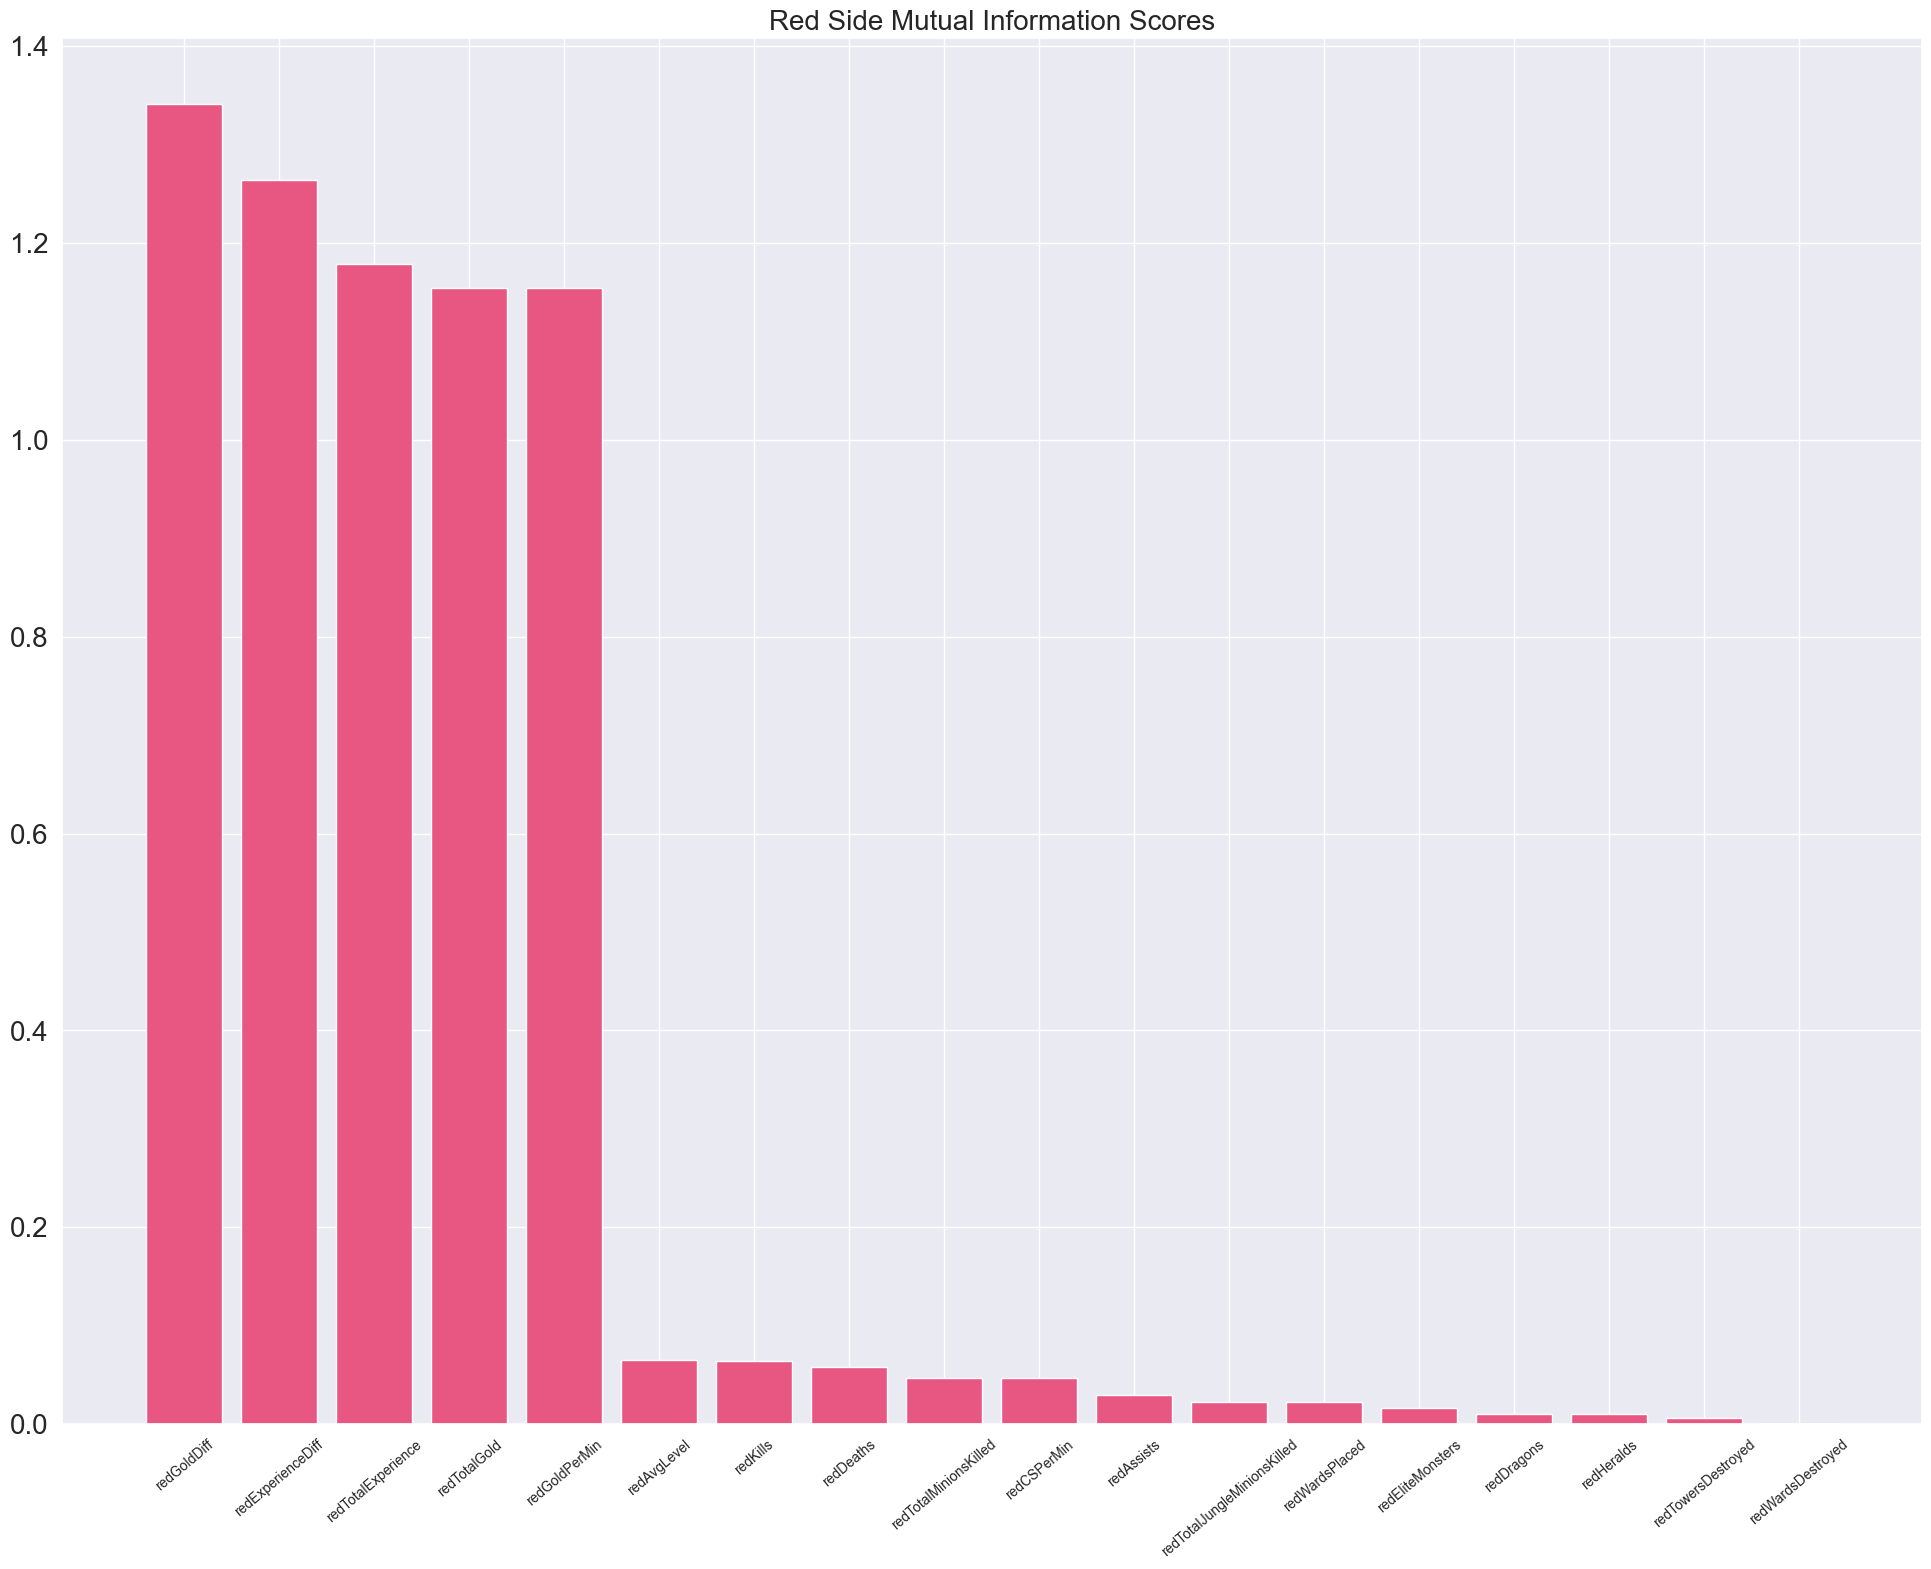

In [24]:
X = redside_df.copy(deep=True)
y = X.pop('redWins')
discrete_features = X.dtypes

plt.figure(dpi=100, figsize=(24, 18))

red_mi_scores = make_mi_scores(X, y, discrete_features)
plot_mi_scores("Red Side", red_mi_scores)

From this analysis, it's clear that gold and experience are the greatest indicators of game results, as gold difference, experience difference, total experience, total gold, and gold per minute have the highest mutual information scores. 

## Decision Tree Model 
Now that we have a better idea of what features best indicate the winning of a game, lets create a decision tree model.

In [25]:
features = ['blueGoldDiff', 'blueExperienceDiff', 'blueTotalExperience', 'blueTotalGold', 'blueGoldPerMin',
            'redGoldDiff', 'redExperienceDiff', 'redTotalExperience', 'redTotalGold', 'redGoldPerMin']

X = allgames_df[features]
y = allgames_df.blueWins

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Decision Tree Model
dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(train_X, train_y)
dt_prediction = dt_model.predict(val_X)

Let's look at the Mean Squared Error (MSE) to see how well our Decision Tree Model performs. The MSE represents "the error of the estimator or predictive model created based on the given set of observations in the sample" (<a href="https://vitalflux.com/mean-square-error-r-squared-which-one-to-use/">A. Kumar, Data Analytics</a>). Essentially, it represents the cost associated with the predictions or the loss incurred in the predictions. 

MSE always falls within a range of 0 to 1, inclusive. A value closer to 0 means a better model. 

In [26]:
MSE = mean_squared_error(val_y, dt_prediction, squared=True)
print("Mean Squared Error: ", MSE)

Mean Squared Error:  0.3809716599190283


Our MSE is pretty low! We choose good features when building our decision tree model. Feel free to go back to the previous cell and play around with the selected features and see how it impacts the MSE. 

## Conclusion
Our decision tree model had a MSE of ~0.38, and the most important features in predicting the outcome of a game include gold difference, experience difference, total experience, total gold, and gold per minute. 

This conclusion suggests that gold & experience are the biggest indicator of whether a team will win or not, specifically the gold & experience differences between teams at 10 minutes. 

Of course, this conclusion doesn't mean that the other factors are unimportant or not impactful; rather, things like vision, objectives, and deaths indirectly impact how much gold a team earns. Greater vision can lead to better map control & pressure, thus setting a team up for greater success when securing objectives that grant gold & buffs. Getting more kills grants more gold, while dying often denies gold. 

To conclude, League is an incredibly complex game and there is no single feature that can be used to accurately predict the outcome of a game. However, it is clear that gold & experience is the most reliable factor when it comes to winning games. 